In [1]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]

Populating the interactive namespace from numpy and matplotlib


The tiles are generated from the new PixTile algorithm

In [3]:
tiles = pkl.load(open("pixel_em/10workers_rand0/obj1/tiles.pkl"))

In [4]:
tile = np.array(list(tiles[0]))

In [7]:
def edge_neighbor_widx(wmap,source):
    x=source[0]
    y=source[1]
    valid_neighbors = []
    w,h = np.shape(wmap)
    if x+1<w:
        valid_neighbors.append((x+1,y))
    if y+1<h:
        valid_neighbors.append((x,y+1))
    if x-1>=0:
        valid_neighbors.append((x-1,y))
    if y-1>=0:
        valid_neighbors.append((x,y-1))
    #return (x+1,y),(x,y+1),(x-1,y),(x,y-1)
    return valid_neighbors

In [8]:
sample='5workers_rand0'
objid=1
imgsize = pkl.load(open("pixel_em/{}/obj{}/mega_mask.pkl".format(sample,objid)))

In [214]:
adjacent_lst = [[] for _t in tiles]
exclude_lst = [[] for _t in tiles]

In [215]:
for i in range(1,len(tiles)): # exclude the big outside tile, we don't really need to know who is connected to the outside tile
    for pix in tiles[i]: 
        if pix not in exclude_lst[i]:
            neighbors = edge_neighbor_widx(imgsize,pix)
            # get the adjacent tile of from the neighboring pixel
            adjacent_tile =-1
            for nix in neighbors:
                tiles_exclude_self = [_t  for _t in tiles if _t!=tiles[i]] # not checking adjacency against self
                for tidx,t in enumerate(tiles_exclude_self):
                    if nix in t:
                        adjacent_lst[i].append(tidx)
                        adjacent_tile = tidx
                        # store boundary information 
                        break
#                 break
            #exclude_lst[i].append(list(tiles[adjacent_tile])[0])

In [216]:
# hard_lst = [1,len(tiles)-1]
# for hard_tidx in hard_lst:
hard_tidx=0
for atidx,at in enumerate(adjacent_lst):
    if hard_tidx in at:
        adjacent_lst[hard_tidx].append(atidx)

# Testing 


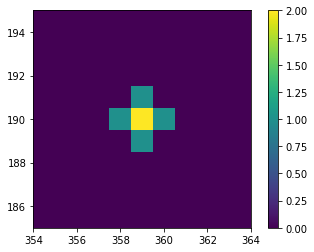

In [218]:
neighbors = edge_neighbor_widx(imgsize,pix)

mask = np.zeros_like(imgsize)
for n in neighbors:
    mask[n] = 1
mask[pix]=2

zoom_radius = 5
x=int(mean(np.where(mask==1)[1]))
y=int(mean(np.where(mask==1)[0]))
plt.figure()
plt.imshow(mask)
plt.xlim(x-zoom_radius,x+zoom_radius)
plt.ylim(y-zoom_radius,y+zoom_radius)
plt.colorbar()

Check 0th (outside) tile

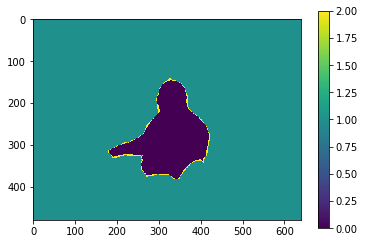

In [219]:
test_tidx=0
mask = np.zeros_like(imgsize)

for tidx in tiles[test_tidx]:
    mask[tidx]=1
for neighbor_tile in set(adjacent_lst[test_tidx]):
    for tidx in tiles[neighbor_tile]:
        mask[tidx]=2
plt.figure()
plt.imshow(mask)
plt.colorbar()

In [220]:
len(adjacent_lst)

1453

ValueError: cannot convert float NaN to integer

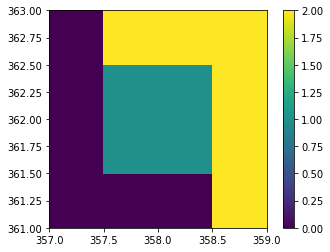

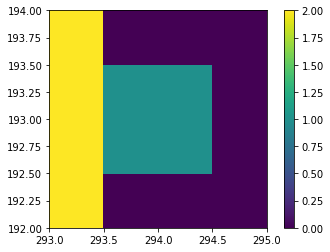

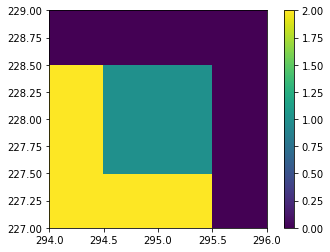

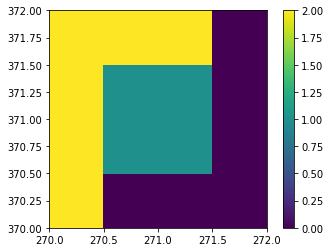

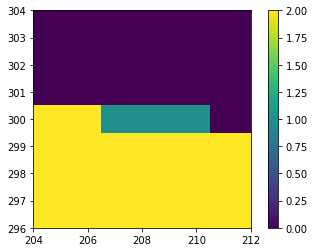

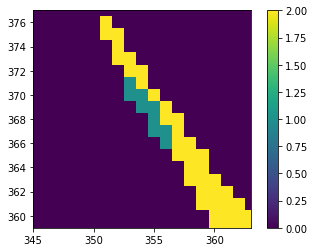

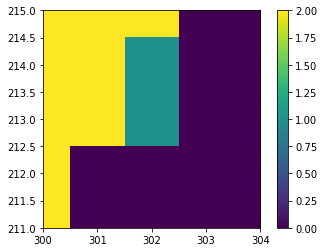

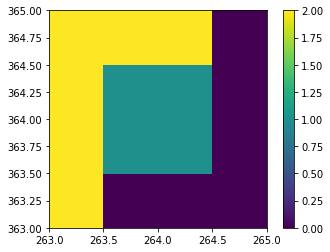

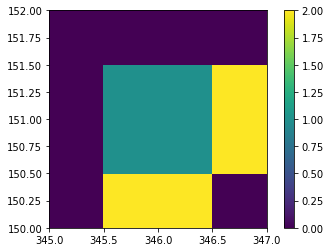

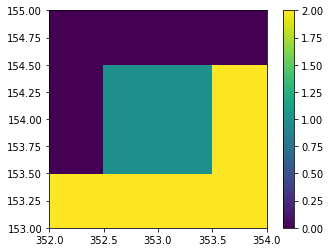

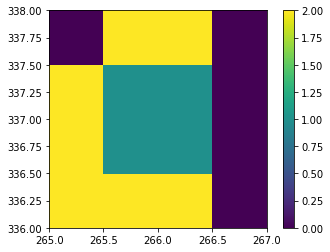

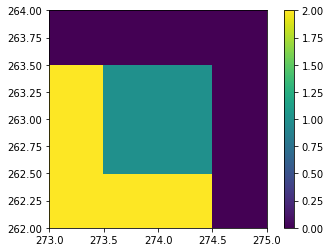

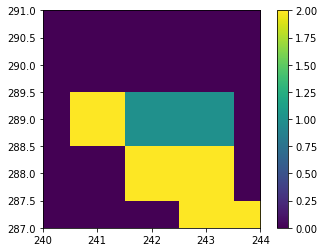

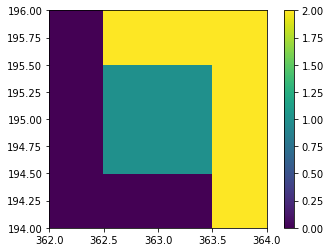

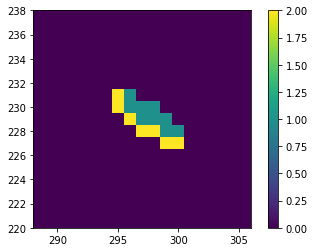

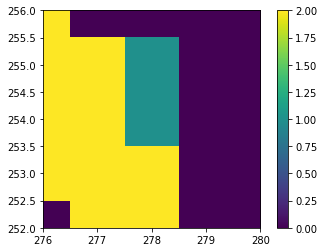

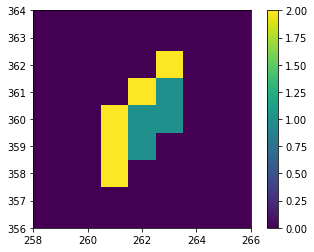

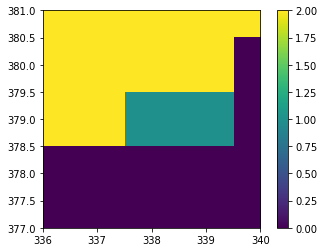

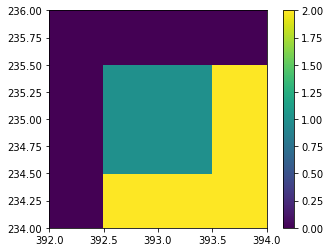

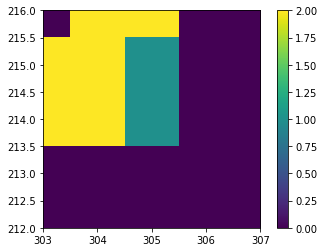

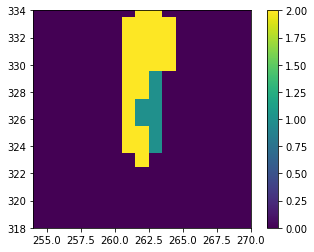

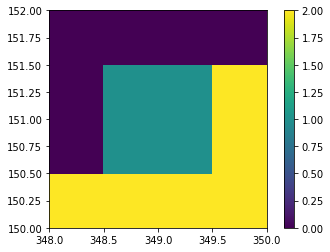

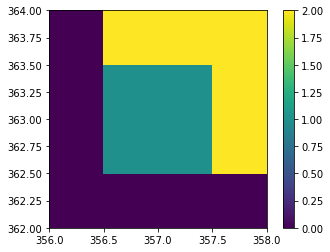

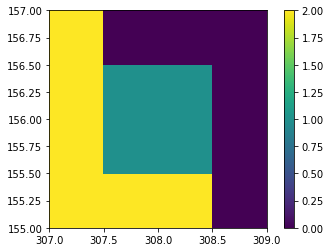

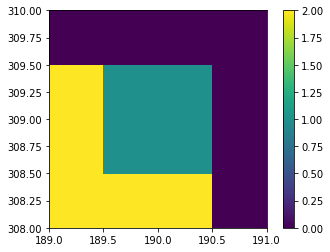

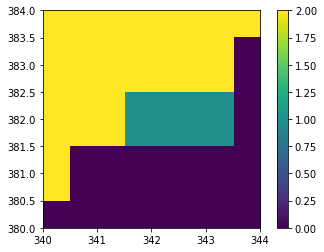

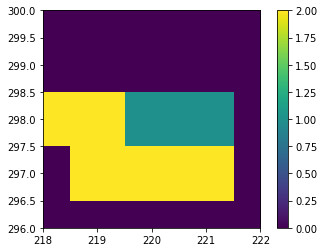

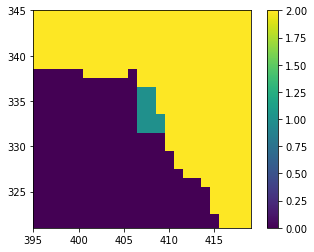

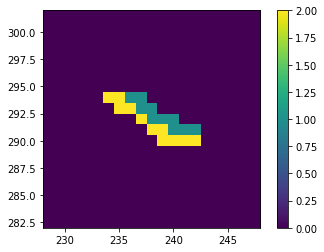

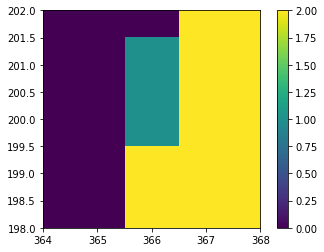

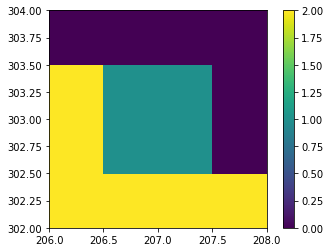

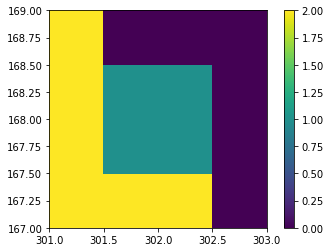

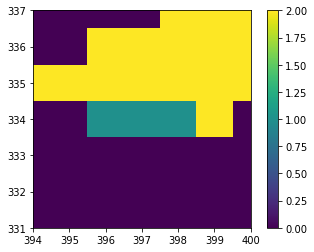

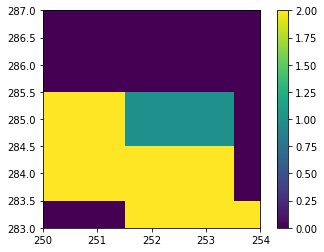

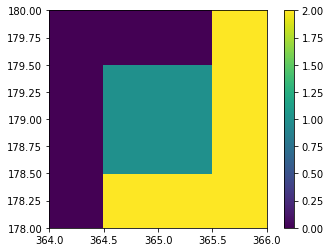

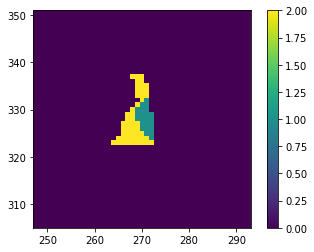

In [221]:
for test_tidx in np.random.choice(range(len(adjacent_lst)),150):
    mask = np.zeros_like(imgsize)

    for tidx in tiles[test_tidx]:
        mask[tidx]=1

    #print tiles[test_tidx]

    for neighbor_tile in set(adjacent_lst[test_tidx]):
        for tidx in tiles[neighbor_tile]:
            mask[tidx]=2
            #print tidx
        #print neighbor_tile

    x=int(mean(np.where(mask==1)[1]))
    y=int(mean(np.where(mask==1)[0]))
    zoom_radius = len(tiles[test_tidx])
    plt.figure()
    plt.imshow(mask)
    plt.xlim(x-zoom_radius,x+zoom_radius)
    plt.ylim(y-zoom_radius,y+zoom_radius)
    plt.colorbar()